In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as pl
import seaborn as sns
import bbknn
import scvelo as scv
import anndata
import leidenalg
import loompy
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
from matplotlib.pyplot import rc_context
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import os
import random

C:\Users\tpsa222\.conda\envs\young\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\tpsa222\.conda\envs\young\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\tpsa222\.conda\envs\young\lib\site-packages\umap\distances.py:1086: NumbaDeprecatio

In [2]:
sc.set_figure_params(format='png')  # for beautified visualization
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params(style='scvelo', format='png')  # for beautified visualization

In [3]:
# Set working directory
os.chdir("Y:/Tolulope/Cellranger Results/YOUNG")

In [ ]:
adata = sc.read_h5ad('integrated aged.h5ad')

In [ ]:
#UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['cell type'],  legend_fontsize=12, legend_fontoutline=2, frameon=True, size=80, title='Clustering of Cells', save=f'umap_plot{img_tag}.png')
pl.show()

In [ ]:
cell_type = {
    "0": "Immune cells",
    "1": "Fibroadipogenic cells",
    "2": "Immune cells",
    "3": "Mature skeletal muscle",
    "4": "Fibroadipogenic cells",
    "5": "MuSCs and myogenic progenitors",
    "6": "Endothelial cells",
    "7": "MuSCs and myogenic progenitors",
    "8": "Immune cells",
    "9": "Mature skeletal muscle",
    "10": "Immune cells",
    "11": "Fibroadipogenic cells",
    "12": "Proliferation",
    "13": "Immune cells",
    "14": "Mature myocytes",
    "15": "Immune cells",
    "16": "Pericyte cells", 
    "17": "Tenocyte",
    "18": "Immune cells",
    "19": "Schwann cells",
    "20": "Immune cells",
   
}

In [ ]:
adata.obs['cell type'] = adata.obs.leiden.map(cell_type)

In [ ]:
#UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['cell type'],  legend_fontsize=12, legend_fontoutline=2, frameon=True, size=80, title='Clustering of Cells', save=f'umap_plot{img_tag}.png')
pl.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
"""
from sklearn.neighbors import KernelDensity
import pylab as p
import scipy.interpolate as interpolate
"""
import warnings
warnings.filterwarnings('ignore')
%qtconsole

In [ ]:
# Set figure parameters


celltypePalette = {
    "Endothelial cells": '#2ca02c',
    "Fibroadipogenic cells": '#9467bd',
    "Immune cells": '#1f77b4',
    "Mature skeletal muscle": '#d62728',
    "MuSCs and myogenic progenitors": '#ff7f0e',
    "Pericyte cells": '#7f7f7f',
    "Schwann cells": '#e377c2',
    "Proliferation": '#9edae5',
    "Mature myocytes": '#bcbd22',
    "Tenocyte": '#8c564b',
    
}
# Set figure parameters
sc.set_figure_params(figsize=(10, 10))

# Plot UMAP with specified color palette for cell types
sc.pl.umap(adata, color='cell type', palette=celltypePalette, legend_fontsize=12, legend_fontoutline=2, frameon=True, size=60, title='Clustering of Cells', save='umap_plot_color.png')
pl.show()

In [ ]:

# Identify Marker Genes for each cell type
sc.tl.rank_genes_groups(adata, method='wilcoxon', groupby="cell type")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, save="_celltype_markers.png")


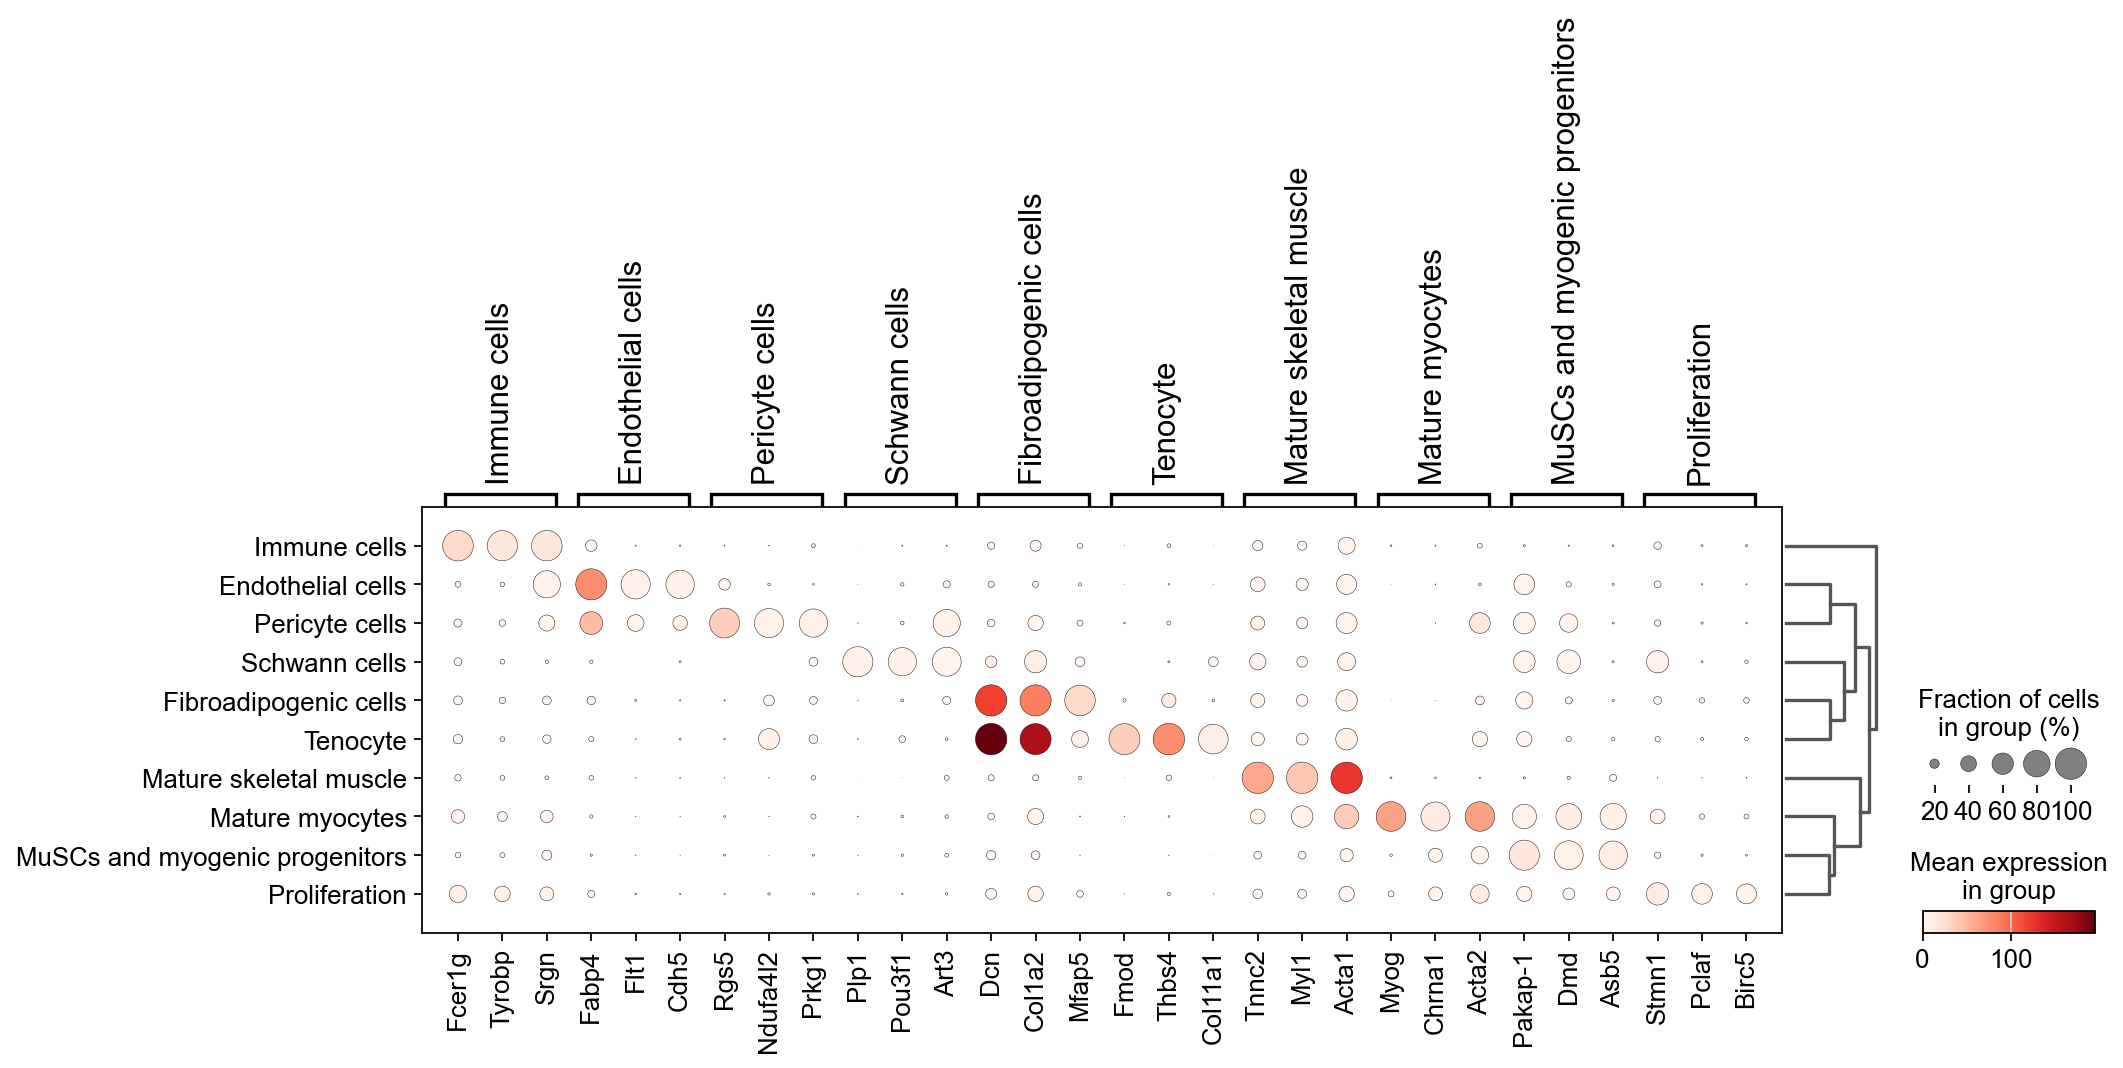

In [13]:
# Visualize marker genes using core dotplot functions
sc.pl.rank_genes_groups_dotplot(adata, groupby='cell type', n_genes=3, save='dotplot2_Mesen.png')


In [28]:
adata = sc.read_h5ad('integrated aged.h5ad')

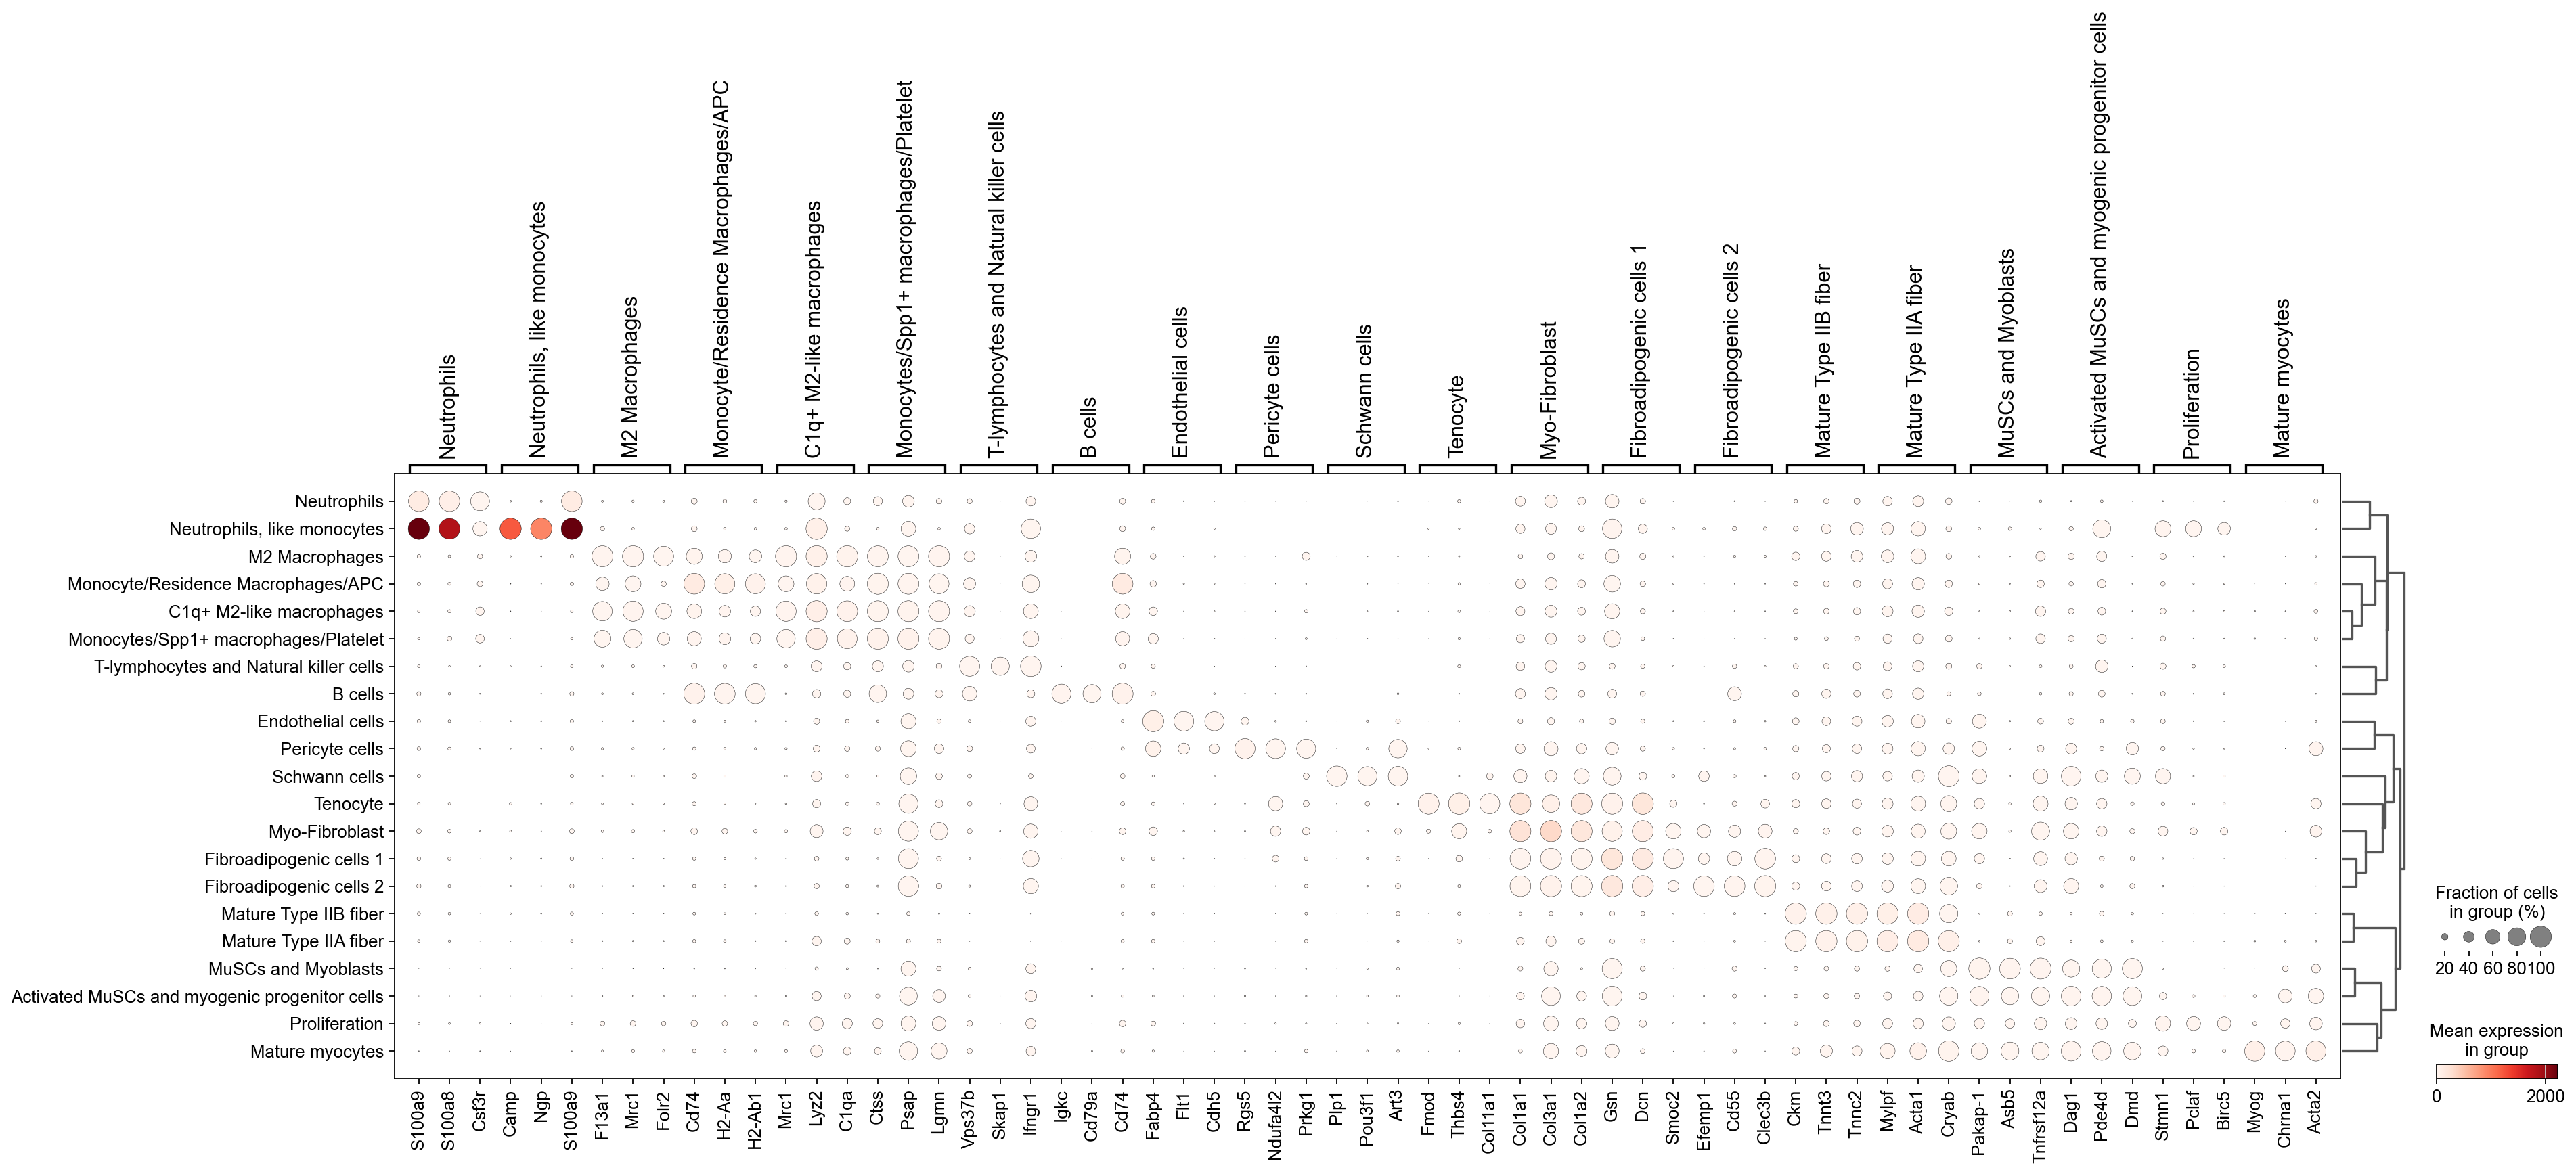

In [17]:
# Visualize marker genes using core dotplot functions
sc.pl.rank_genes_groups_dotplot(adata, groupby='cell type', n_genes=3, save='dotplot2_Mesen.png')


Subset size: 23653 cells


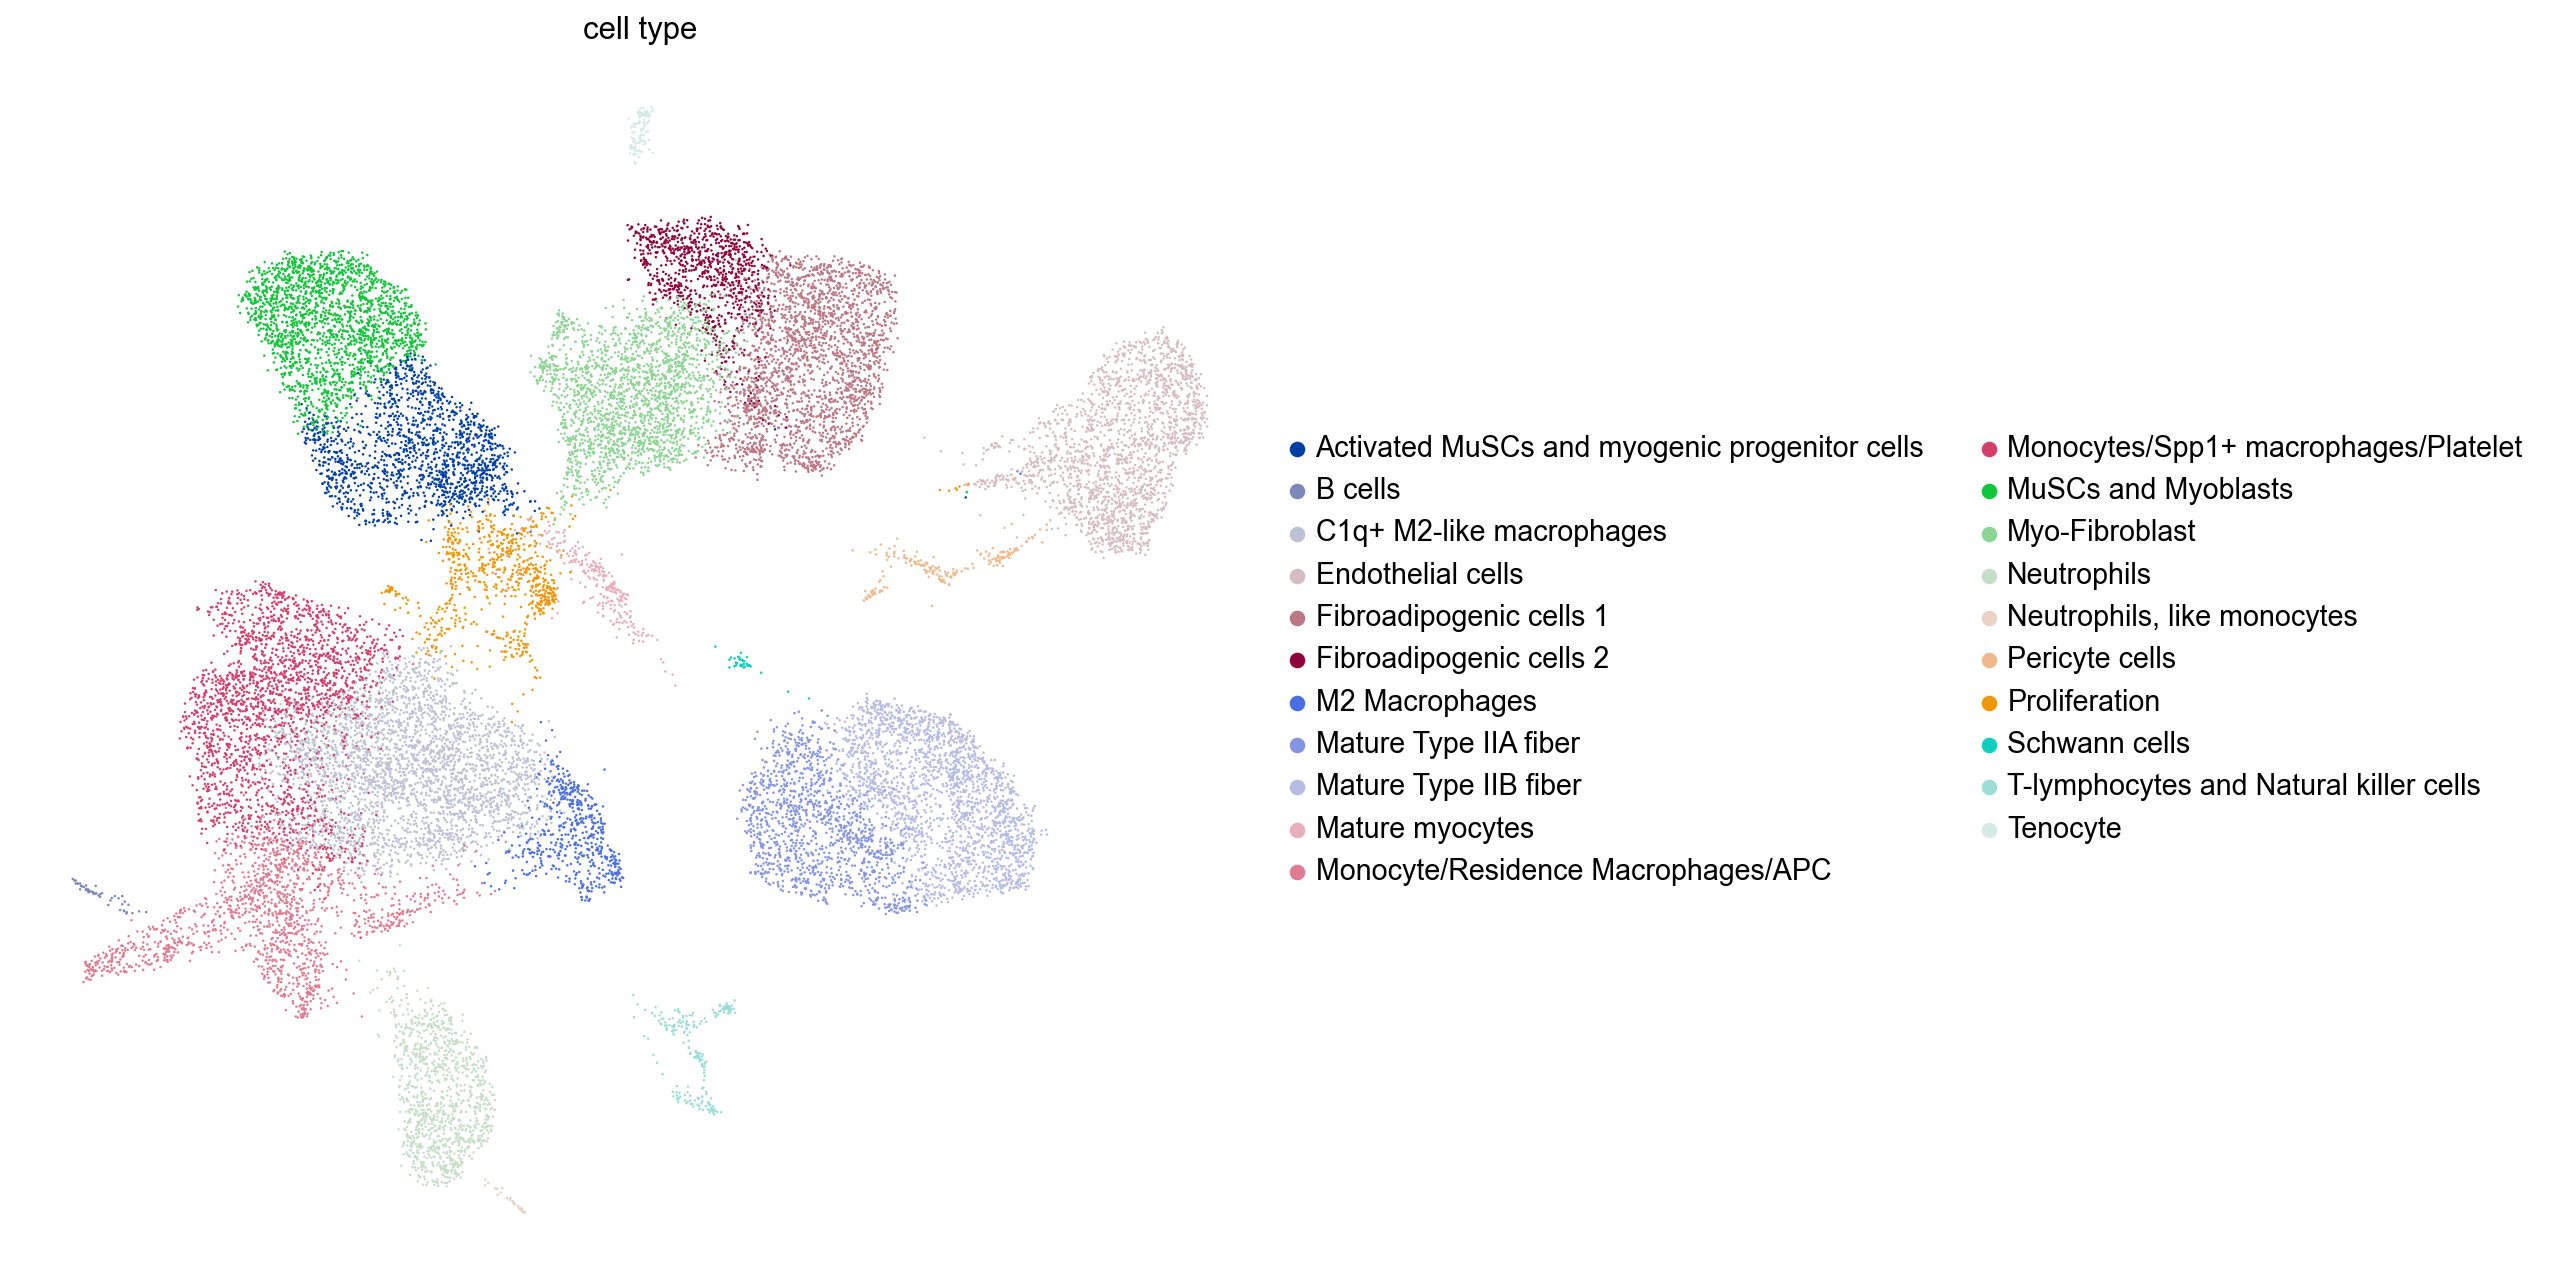

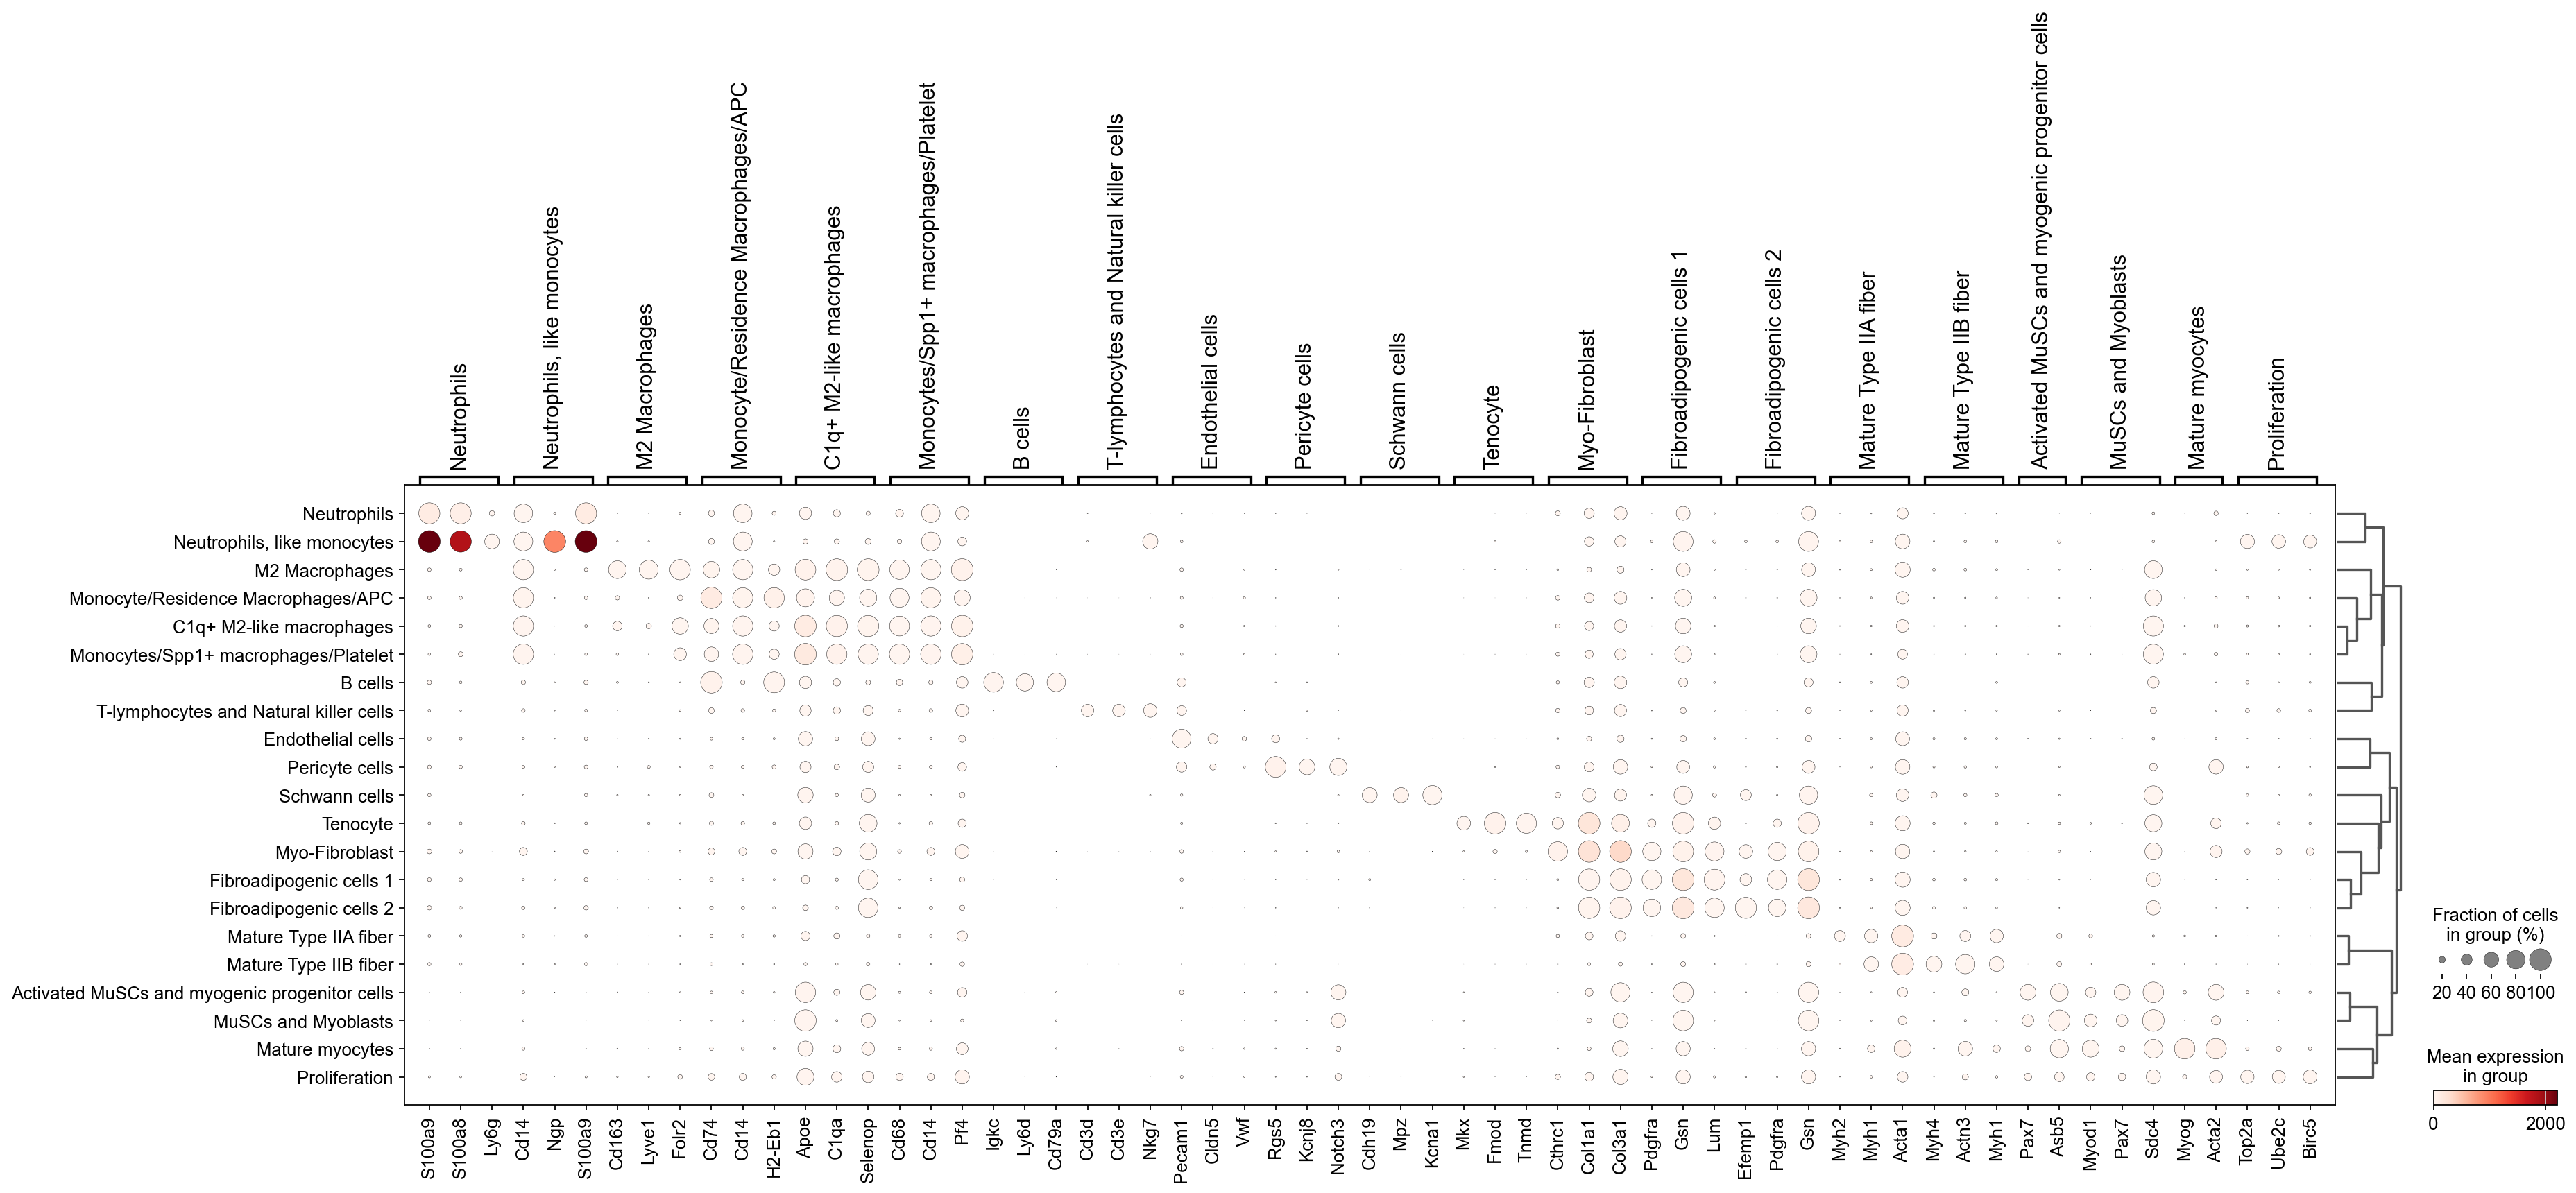

In [15]:
import scanpy as sc
import matplotlib.pyplot as plt

# Your cell_type dictionary
cell_type = {
    "0": "C1q+ M2-like macrophages",
    "1": "Fibroadipogenic cells 1",
    "2": "Monocytes/Spp1+ macrophages/Platelet",
    "3": "Mature Type IIB fiber",
    "4": "Myo-Fibroblast",
    "5": "MuSCs and Myoblasts",
    "6": "Endothelial cells",
    "7": "Activated MuSCs and myogenic progenitor cells",
    "8": "Monocyte/Residence Macrophages/APC",
    "9": "Mature Type IIA fiber",
    "10": "Neutrophils",
    "11": "Fibroadipogenic cells 2",
    "12": "Proliferation",
    "13": "M2 Macrophages",
    "14": "Mature myocytes",
    "15": "T-lymphocytes and Natural killer cells",
    "16": "Pericyte cells",
    "17": "Tenocyte",
    "18": "B cells",
    "19": "Schwann cells",
    "20": "Neutrophils, like monocytes",
}

# Convert 'leiden' values to string cell types
adata.obs['cell type'] = adata.obs['leiden'].astype(str).map(cell_type)

# Define the desired cell types for subsetting
Mesen = [
    "C1q+ M2-like macrophages",
    "Fibroadipogenic cells 1",
    "Monocytes/Spp1+ macrophages/Platelet",
    "Mature Type IIB fiber",
    "Myo-Fibroblast",
    "MuSCs and Myoblasts",
    "Endothelial cells",
    "Activated MuSCs and myogenic progenitor cells",
    "Monocyte/Residence Macrophages/APC",
    "Mature Type IIA fiber",
    "Neutrophils",
    "Fibroadipogenic cells 2",
    "Proliferation",
    "M2 Macrophages",
    "Mature myocytes",
    "T-lymphocytes and Natural killer cells",
    "Pericyte cells",
    "Tenocyte",
    "B cells",
    "Schwann cells",
    "Neutrophils, like monocytes",
]

# Filter cells based on the 'cell type' annotation using string values
adata_subset = adata[adata.obs['cell type'].isin(Mesen)]

# Print information about the subset size
print(f"Subset size: {len(adata_subset)} cells")

# Check if the subset is not empty before plotting
if len(adata_subset) > 0:
    # Plot UMAP with 'cell type' annotations
    sc.set_figure_params(figsize=(10, 10))
    sc.pl.umap(adata_subset, color=['cell type'], frameon=False, save='umap_plot.png')

    # Plot and save the dot plot
    sc.set_figure_params(figsize=(10, 10))
    # Define marker genes for each cell type
    marker_genes_dict = {
        "C1q+ M2-like macrophages": ['Apoe', 'C1qa', 'Selenop'],
        "Fibroadipogenic cells 1": ['Pdgfra', 'Gsn', 'Lum'],
        "Monocytes/Spp1+ macrophages/Platelet": ['Cd68', 'Cd14', 'Pf4'],
        "Mature Type IIB fiber": ['Myh4', 'Actn3', 'Myh1'],
        "Myo-Fibroblast": ['Cthrc1', 'Col1a1', 'Col3a1'],
        "MuSCs and Myoblasts": ['Myod1', 'Pax7', 'Sdc4'],
        "Endothelial cells": ['Pecam1', 'Cldn5', 'Vwf'],
        "Activated MuSCs and myogenic progenitor cells": ['Pax7', 'Asb5'],
        "Monocyte/Residence Macrophages/APC": ['Cd74', 'Cd14', 'H2-Eb1'],
        "Mature Type IIA fiber": ['Myh2', 'Myh1', 'Acta1'],
        "Neutrophils": ['S100a9', 'S100a8', 'Ly6g'],
        "Fibroadipogenic cells 2": ['Efemp1', 'Pdgfra', 'Gsn'],
        "Proliferation": ['Top2a', 'Ube2c', 'Birc5'],
        "M2 Macrophages": ['Cd163', 'Lyve1', 'Folr2'],
        "Mature myocytes": ['Myog', 'Acta2'],
        "T-lymphocytes and Natural killer cells": ['Cd3d', 'Cd3e', 'Nkg7'],
        "Pericyte cells": ['Rgs5', 'Kcnj8', 'Notch3'],
        "Tenocyte": ['Mkx', 'Fmod', 'Tnmd'],
        "B cells": ['Igkc', 'Ly6d', 'Cd79a'],
        "Schwann cells": ['Cdh19', 'Mpz', 'Kcna1'],
        "Neutrophils, like monocytes": ['Cd14', 'Ngp', 'S100a9'],
    }
    
    sc.pl.dotplot(adata_subset, marker_genes_dict, groupby='cell type', dendrogram=True, save='dotplot_Mesen.png')

    # Show the dot plot
    plt.show()
else:
    print("Warning: Subset is empty. No UMAP plot or dot plot generated.")


Subset size: 8443 cells


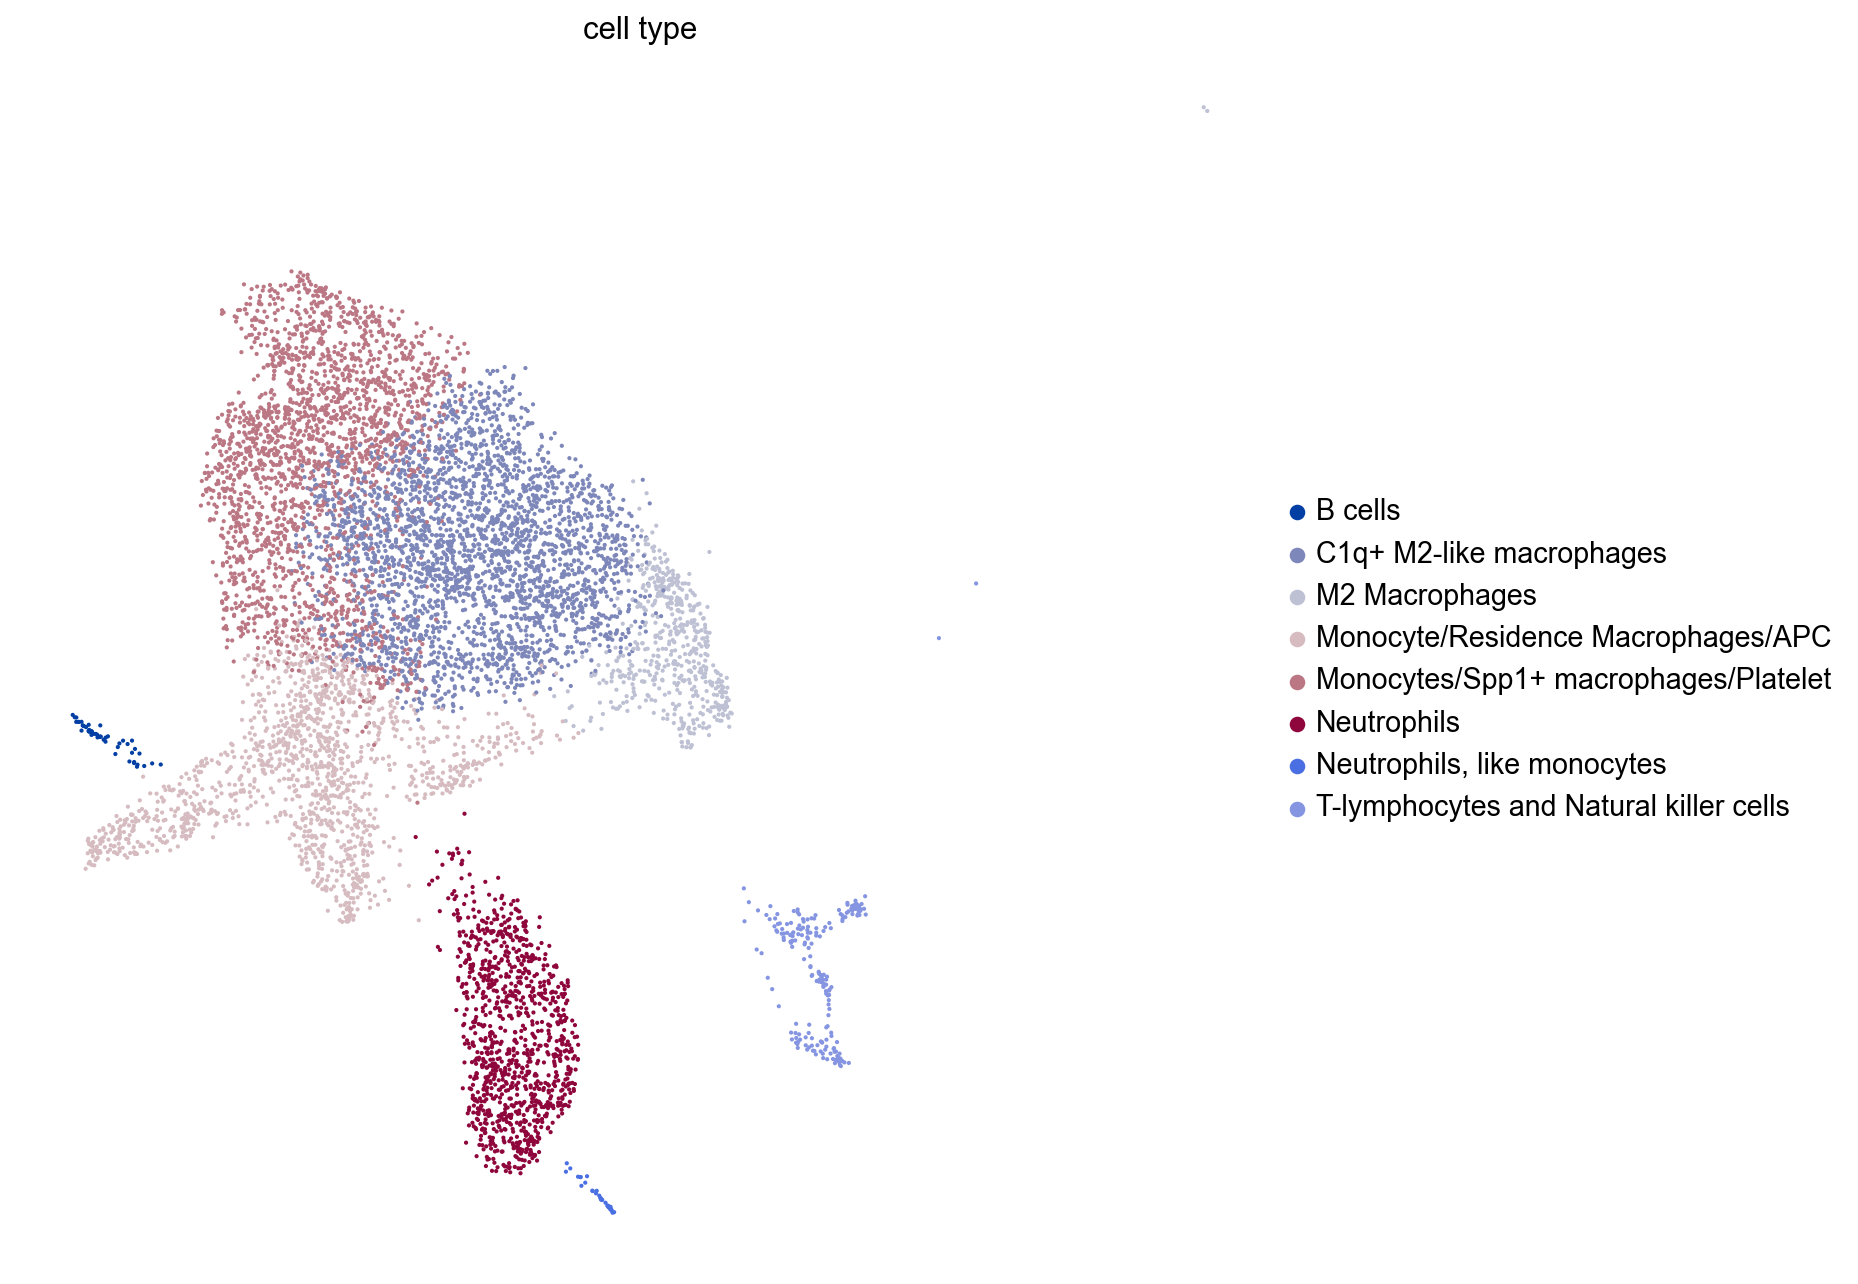

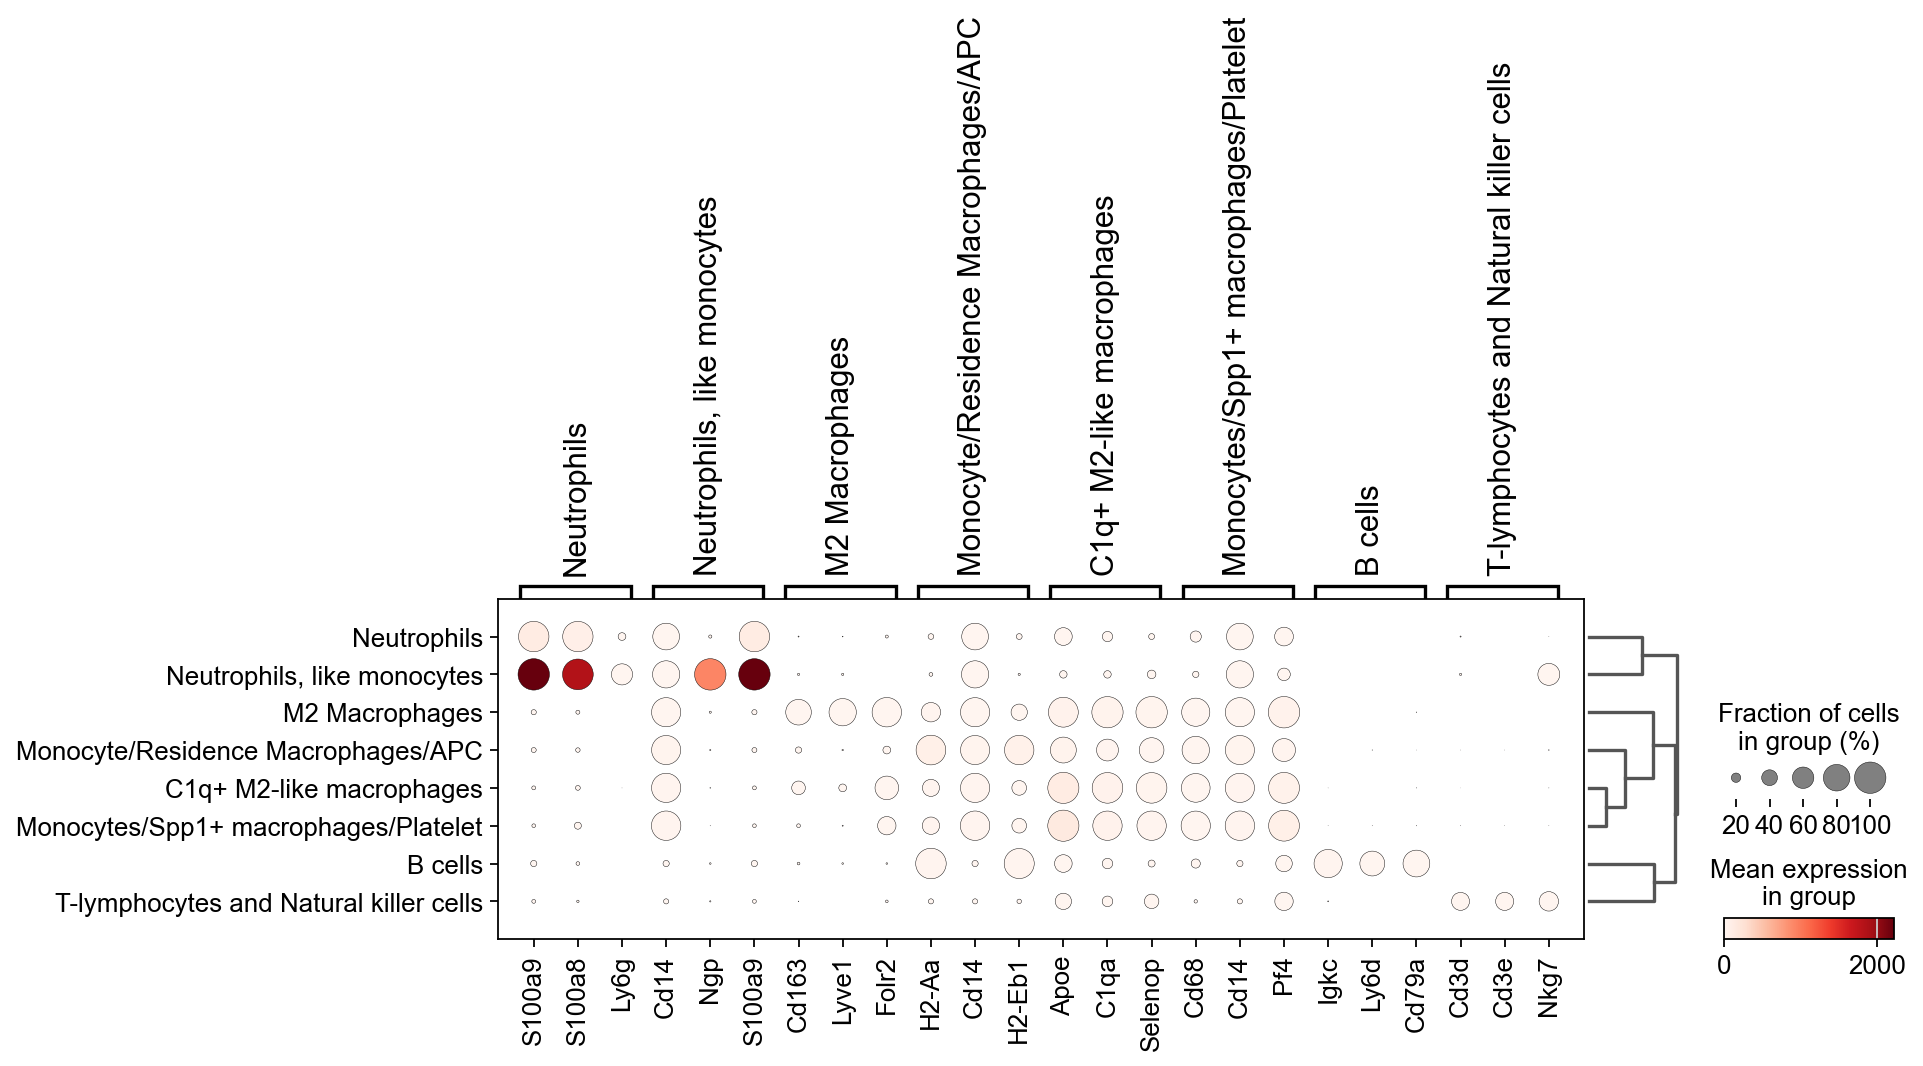

In [17]:
import scanpy as sc
import matplotlib.pyplot as plt

# Your cell_type dictionary
cell_type = {
    "0": "C1q+ M2-like macrophages",
    "1": "Fibroadipogenic cells 1",
    "2": "Monocytes/Spp1+ macrophages/Platelet",
    "3": "Mature Type IIB fiber",
    "4": "Myo-Fibroblast",
    "5": "MuSCs and Myoblasts",
    "6": "Endothelial cells",
    "7": "Activated MuSCs and myogenic progenitor cells",
    "8": "Monocyte/Residence Macrophages/APC",
    "9": "Mature Type IIA fiber",
    "10": "Neutrophils",
    "11": "Fibroadipogenic cells 2",
    "12": "Proliferation",
    "13": "M2 Macrophages",
    "14": "Mature myocytes",
    "15": "T-lymphocytes and Natural killer cells",
    "16": "Pericyte cells",
    "17": "Tenocyte",
    "18": "B cells",
    "19": "Schwann cells",
    "20": "Neutrophils, like monocytes",
}

# Convert 'leiden' values to string cell types
adata.obs['cell type'] = adata.obs['leiden'].astype(str).map(cell_type)

# Define the desired cell types for subsetting
Mesen = [
    "C1q+ M2-like macrophages",
   
    "Monocytes/Spp1+ macrophages/Platelet",
    
    "Monocyte/Residence Macrophages/APC",
    
    "Neutrophils",
    
    "M2 Macrophages",
    
    "T-lymphocytes and Natural killer cells",
    
    "B cells",
    
    "Neutrophils, like monocytes",
]

# Filter cells based on the 'cell type' annotation using string values
adata_subset = adata[adata.obs['cell type'].isin(Mesen)]

# Print information about the subset size
print(f"Subset size: {len(adata_subset)} cells")

# Check if the subset is not empty before plotting
if len(adata_subset) > 0:
    # Plot UMAP with 'cell type' annotations
    sc.set_figure_params(figsize=(10, 10))
    sc.pl.umap(adata_subset, color=['cell type'], frameon=False, save='umap_plot.png')

    # Plot and save the dot plot
    sc.set_figure_params(figsize=(10, 10))
    # Define marker genes for each cell type
    marker_genes_dict = {
        "C1q+ M2-like macrophages": ['Apoe', 'C1qa', 'Selenop'],
        
        "Monocytes/Spp1+ macrophages/Platelet": ['Cd68', 'Cd14', 'Pf4'],
        
        "Monocyte/Residence Macrophages/APC": ['H2-Aa', 'Cd14', 'H2-Eb1'],
        
        "Neutrophils": ['S100a9', 'S100a8', 'Ly6g'],
        
        "M2 Macrophages": ['Cd163', 'Lyve1', 'Folr2'],
        
        "T-lymphocytes and Natural killer cells": ['Cd3d', 'Cd3e', 'Nkg7'],
        
        "B cells": ['Igkc', 'Ly6d', 'Cd79a'],
        
        "Neutrophils, like monocytes": ['Cd14', 'Ngp', 'S100a9'],
    }
    
    sc.pl.dotplot(adata_subset, marker_genes_dict, groupby='cell type', dendrogram=True, save='dotplot_Mesen.png')

    # Show the dot plot
    plt.show()
else:
    print("Warning: Subset is empty. No UMAP plot or dot plot generated.")
